---
## Imports
---

In [0]:
# List files in /FileStore/tables to confirm your CSV is there
display(dbutils.fs.ls("/FileStore/tables"))

path,name,size,modificationTime
dbfs:/FileStore/tables/2025_03_11___DBFS_Example_Classifier.ipynb,2025_03_11___DBFS_Example_Classifier.ipynb,68203,1742288094000
dbfs:/FileStore/tables/Clean_IMDBnew.csv,Clean_IMDBnew.csv,11897936,1748379618000
dbfs:/FileStore/tables/Clean_IMDBnew.parquet/,Clean_IMDBnew.parquet/,0,0
dbfs:/FileStore/tables/IMDB_CLEAN.csv,IMDB_CLEAN.csv,16096967,1748425316000
dbfs:/FileStore/tables/IMDB_CLEAN.parquet/,IMDB_CLEAN.parquet/,0,0
dbfs:/FileStore/tables/IMDB_Cleaned/,IMDB_Cleaned/,0,0
dbfs:/FileStore/tables/IMDB_cleannew.csv,IMDB_cleannew.csv,16096967,1748387484000
dbfs:/FileStore/tables/Imdb_Movie_Dataset-1.csv,Imdb_Movie_Dataset-1.csv,392283051,1746882391000
dbfs:/FileStore/tables/Imdb_Movie_Dataset-4.csv/,Imdb_Movie_Dataset-4.csv/,0,0
dbfs:/FileStore/tables/Imdb_Movie_Dataset.csv/,Imdb_Movie_Dataset.csv/,0,0


In [0]:
# File location and type
file_location = "/FileStore/tables/Imdb_Movie_Dataset-1.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
# quote <-- Important to handle commas correctly
df = (
    spark.read.format(file_type)
    .option("inferSchema", infer_schema)
    .option("header", first_row_is_header)
    .option("sep", delimiter)
    .option("quote", '"')
    .option("escape", '"')
    .load(file_location)
)

display(df.limit(5))

id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,false,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconscious.",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pictures","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious"
157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,false,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.,140.241,Mankind was born on Earth. It was never meant to die here.,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Productions","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time, artificial intelligence (a.i.), nasa, time warp, dystopia, expedition, space travel, wormhole, famine, black hole, quantum mechanics, family relationships, space, robot, astronaut, scientist, single father, farmer, space station, curious, space adventure, time paradox, thoughtful, time-manipulation, father daughter relationship, 2060s, cornfield, time manipulation, complicated"
155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,false,185000000,tt0468569,en,The Dark Knight,"Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.",130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime fighter, superhero, anti hero, scarecrow, based on comic, vigilante, organized crime, tragic hero, anti villain, criminal mastermind, district attorney, super power, super villain, neo-noir"
19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,false,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, 20th Century Fox, Ingenious Media","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, space war, space colony, tribe, romance, alien, futuristic, space, alien planet, marine, soldier, battle, love affair, nature, anti war, power relations, joyful"
24428,The Avengers,7.71,29166,Released,4/25/2012,1518815515,143,false,220000000,tt0848228,en,The Avengers,"When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disast

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import (col, count, when, isnan, row_number, to_date, split, regexp_replace, expr, corr)

from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import ChiSqSelector, VectorAssembler, QuantileDiscretizer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor

spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")  # to parse the release date without problems

---
## Define the Data Cleaning Function
---

In [0]:
def drop_duplicates_keep_least_null(df, id_col):
    """
    Deduplicate on `id_col`, keeping the row with the fewest null values.
    Rows with null `id_col` are left unchanged.
    """
    print(f"Starting deduplication on column: {id_col}")

    non_null_df = df.filter(col(id_col).isNotNull())
    null_df     = df.filter(col(id_col).isNull())
    print(f"Rows with non-null '{id_col}': {non_null_df.count()}")
    print(f"Rows with null '{id_col}': {null_df.count()}")

    null_count_expr = sum(
        when(col(c).isNull(), 1).otherwise(0) for c in non_null_df.columns
    ).alias("_null_cnt")

    nn_with_counts = non_null_df.withColumn("_null_cnt", null_count_expr)
    print("Added null count column for ranking")

    w = Window.partitionBy(id_col).orderBy(col("_null_cnt").asc())
    ranked = nn_with_counts.withColumn("_rn", row_number().over(w))
    print("Ranked rows within each group")

    deduped = (
        ranked
        .filter(col("_rn") == 1)
        .drop("_null_cnt", "_rn")
    )
    print("Filtered to keep only top-ranked rows with fewest nulls")

    result_df = deduped.unionByName(null_df)
    print(f"Final row count after deduplication on '{id_col}': {result_df.count()}")
    return result_df

def _build_top_indicator(df, col_name, top_n, suffix):
    """
    For a comma-separated string column (e.g., 'Adventure, Comedy, Science Fiction'),
    create binary columns for the top-N most profitable individual items.
    """
    print(f"Creating top-{top_n} binary indicator columns for: {col_name}")
    arr_col = F.split(F.col(col_name), ",\\s*")

    exploded = (
        df.select(arr_col.alias("arr"), "revenue")
          .withColumn("item", F.explode("arr"))
          .withColumn("item", F.trim(F.col("item")))
          .groupBy("item")
          .agg(F.sum("revenue").alias("tot_rev"))
          .orderBy(F.col("tot_rev").desc())
          .limit(top_n)
    )

    top_items = [row["item"] for row in exploded.collect()]
    print(f"Top {top_n} items for '{col_name}': {top_items}")

    for item in top_items:
        clean_name = item.strip().lower().replace(" ", "_").replace("-", "_").replace("(", "").replace(".", "")
        df = df.withColumn(
            f"{suffix}_{clean_name}",
            F.when(F.array_contains(arr_col, item), 1).otherwise(0)
        )
        print(f"Created binary column: {suffix}_{clean_name}")

    return df

# main data cleaner
def initial_preprocess(df):
    """
    1. Drop rows with revenue == 0 (it's our first step to make the dataset lighter and thus the following operations faster)
    2. Replace literal 'None' / 'none' in imdb_id with null
    3. Deduplicate on id, then on imdb_id using fewest-null rule
    4. Drop heavy text cols
    5. Change the data types to correct ones
    6. Fix incorrect values for vote_average (should only be in the range 1-10)
    7. Set the vote vote_average to zero, when vote_count == 0
    8. Cast the release_date to data type 
    9. Create release -day, -month, -year features
    10. Create a binary feature 'released_bool', that takes on 1 when the movie has been released and 0 for any other status
    11. Create a binary feature 'en_bool', that takes on 1 when the movie has been released and 0 for any other status
    12. Create a binary column 'tagline_bool' that takes on 1 when the movie had a tagline and 0 when it didnt
    13. Create a retun on investment column (ROI)
    14. Create boolean features for the columns with multiple string values: "genres", "production_companies", "production_countries", "keywords"
    15. Drop the unneccessary fetures (after feature engineering)
    """
    print("Step 1: Dropping rows with revenue = 0")
    df = df.filter(F.col("revenue") != 0)

    print("Step 2: Replacing 'None' strings in imdb_id with null")
    none_count = df.filter(F.lower(col("imdb_id")) == "none").count()
    df = df.withColumn(
        "imdb_id",
        when(F.lower(col("imdb_id")) == "none", None).otherwise(col("imdb_id"))
    )
    print(f"Number of 'None' values replaced with null in 'imdb_id': {none_count}")

    print("Step 3a: Deduplicating by id")
    df = drop_duplicates_keep_least_null(df, id_col="id")

    print("Step 3b: Deduplicating by imdb_id")
    df = drop_duplicates_keep_least_null(df, id_col="imdb_id")

    print("Step 4: Dropping unused text columns")
    df = df.drop("id", "imdb_id", "title", "original_title", "overview", "spoken_languages")
    
    print("Step 5: Casting to correct data types")
    df = (
        df
        .withColumn("vote_average",  F.col("vote_average").cast(DoubleType()))
        .withColumn("popularity",    F.col("popularity").cast(DoubleType()))
        .withColumn("vote_count",    F.col("vote_count").cast(IntegerType()))
        .withColumn("runtime",       F.col("runtime").cast(IntegerType()))
        .withColumn("adult",         F.col("adult").cast(IntegerType()))
        .withColumn("revenue",       F.col("revenue").cast(LongType()))
        .withColumn("budget",        F.col("budget").cast(LongType()))
    )

    print("Step 6: Fixing out-of-range vote_average values")
    df = df.withColumn(
        "vote_average",
        F.when((F.col("vote_average") < 1) | (F.col("vote_average") > 10), 0.0)
         .otherwise(F.col("vote_average"))
    )

    print("Step 7: Setting vote_average to 0 where vote_count == 0")
    df = df.withColumn(
        "vote_average",
        F.when((F.col("vote_count") == 0) & (F.col("vote_average") != 0), 0.0)
         .otherwise(F.col("vote_average"))
    )

    print("Step 8: Parsing release_date using multiple formats")
    date_eu  = F.to_date(F.col("release_date"), "dd/MM/yyyy")
    date_us  = F.to_date(F.col("release_date"), "MM/dd/yyyy")
    date_iso = F.to_date(F.col("release_date"), "yyyy-MM-dd")
    df = df.withColumn("parsed_date", F.coalesce(date_eu, date_us, date_iso))

    print("Step 9: Creating release_day, release_month, release_year")
    df = (
        df
        .withColumn("release_day",   F.dayofmonth("parsed_date").cast(IntegerType()))
        .withColumn("release_month", F.month("parsed_date").cast(IntegerType()))
        .withColumn("release_year",  F.year("parsed_date").cast(IntegerType()))
    )
    print("Filling missing values in release_day, release_month, release_year with 0")
    df = (
        df
        .withColumn("release_day",   F.when(F.col("release_day").isNull(),   0).otherwise(F.col("release_day")))
        .withColumn("release_month", F.when(F.col("release_month").isNull(), 0).otherwise(F.col("release_month")))
        .withColumn("release_year",  F.when(F.col("release_year").isNull(),  0).otherwise(F.col("release_year")))
    )

    print("Step 10: Creating 'released_bool' binary column from status")
    df = df.withColumn(
        "released_bool",
        F.when(F.col("status") == "Released", 1).otherwise(0)
    )

    print("Step 11: Creating 'en_bool' binary column from original_language")
    df = df.withColumn(
        "en_bool",
        F.when(F.col("original_language") == "en", 1).otherwise(0)
    )

    print("Step 12: Creating 'tagline_bool' from presence of tagline")
    df = (
        df
        .withColumn(
            "tagline",
            F.when(F.lower(F.col("tagline")).isin("none", "null"), F.lit(None))
             .otherwise(F.col("tagline"))
        )
        .withColumn("tagline_bool", F.when(F.col("tagline").isNotNull(), 1).otherwise(0))
    )

    print("Step 13: Creating ROI feature (budget-aware)")
    df = df.withColumn(
        "ROI",
        F.when(F.col("budget") == 0, F.lit(0.0))
         .otherwise((F.col("revenue") - F.col("budget")) / F.col("budget"))
    )

    print("Step 14: Creating top-N indicator columns")
    df = _build_top_indicator(df, "genres",               5, "genre")
    df = _build_top_indicator(df, "production_companies", 3, "prodco")
    df = _build_top_indicator(df, "production_countries", 5, "country")
    df = _build_top_indicator(df, "keywords",             3, "keyword")

    print("Step 15: Dropping raw and intermediate columns")
    df = df.drop(
        "release_date", "status", "original_language", "tagline",
        "genres", "production_companies", "production_countries", "keywords",
        "parsed_date"
    )

    print("Initial preprocessing complete.")
    return df

---
## Clean and Engineer the Data
---

In [0]:
# Apply initial preprocessing
df_final = initial_preprocess(df)

Step 1: Dropping rows with revenue = 0
Step 2: Replacing 'None' strings in imdb_id with null
Number of 'None' values replaced with null in 'imdb_id': 4
Step 3a: Deduplicating by id
Starting deduplication on column: id
Rows with non-null 'id': 20676
Rows with null 'id': 0
Added null count column for ranking
Ranked rows within each group
Filtered to keep only top-ranked rows with fewest nulls
Final row count after deduplication on 'id': 20674
Step 3b: Deduplicating by imdb_id
Starting deduplication on column: imdb_id
Rows with non-null 'imdb_id': 16927
Rows with null 'imdb_id': 3747
Added null count column for ranking
Ranked rows within each group
Filtered to keep only top-ranked rows with fewest nulls
Final row count after deduplication on 'imdb_id': 20664
Step 4: Dropping unused text columns
Step 5: Casting to correct data types
Step 6: Fixing out-of-range vote_average values
Step 7: Setting vote_average to 0 where vote_count == 0
Step 8: Parsing release_date using multiple formats
Ste

### Original 21 Columns – Feature Engineering Summary

| Column Name             | Action Taken / Reason                                                         |
|------------------------|--------------------------------------------------------------------------------|
| id                     | Dropped (identifier, no target relationship)                                   |
| title                  | Dropped (text, should not affect revenue)                                      |
| vote_average           | Kept (numeric feature)                                                         |
| vote_count             | Kept (numeric feature)                                                         |
| status                 | Kept (categorical)                                                             |
| release_date           | Dropped (transformed into `release_day`, `release_month`, `release_year`)      |
| revenue                | Kept (target variable)                                                         |
| runtime                | Kept (numeric feature)                                                         |
| adult                  | Kept (boolean)                                                                 |
| budget                 | Kept (numeric feature)                                                         |
| imdb_id                | Dropped (identifier)                                                           |
| original_language      | Dropped (transformed into `en_bool`)                                           |
| original_title         | Dropped (text)                                                                 |
| overview               | Dropped (long text, transformations needed)                                    |
| popularity             | Kept (numeric feature)                                                         |
| tagline                | Dropped (created `tagline_bool` for boolean present/abs)                       |
| genres                 | Dropped (created boolean columns for top 5 genres)                             |
| production_companies   | Dropped (created boolean columns for top 3 companies)                          |
| production_countries   | Dropped (created boolean columns for top 5 production countries)               |
| spoken_languages       | Dropped (high cardinality – potential future work)                             |
| keywords               | Dropped (created boolean columns for top 3 keywords)                           |


---
## Check the Changes 
---

In [0]:
# 1. Check schema changes
df_final.printSchema()

# 2. Check basic row count
print(f"Final row count: {df_final.count()}")

# 3. Check value range of 'vote_average' (should be between 0 and 10)
df_final.select("vote_average").summary("min", "max").show()

# 4. Check if 'runtime' has any 0 values left
df_final.filter(col("runtime") == 0).count()

# 5. Check if 'release_date' and other dropped columns are really gone
print("release_date" in df_final.columns)     # should be False
print("status" in df_final.columns)           # should be False
print("original_language" in df_final.columns) # should be False

# 6. Show sample of new columns
df_final.select("release_day", "release_month", "release_year", "released_bool", "en_bool", "tagline_bool").show(5)

# 7. Show ROI distribution
df_final.select("ROI").summary("count", "min", "max", "mean").show()

# 8. Check new genre/country/keyword boolean features
genre_cols = [c for c in df_final.columns if c.startswith("genre_")]
df_final.select(genre_cols).show(5)

root
 |-- vote_average: double (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- revenue: long (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- adult: integer (nullable = true)
 |-- budget: long (nullable = true)
 |-- popularity: double (nullable = true)
 |-- release_day: integer (nullable = true)
 |-- release_month: integer (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- released_bool: integer (nullable = false)
 |-- en_bool: integer (nullable = false)
 |-- tagline_bool: integer (nullable = false)
 |-- ROI: double (nullable = true)
 |-- genre_action: integer (nullable = false)
 |-- genre_adventure: integer (nullable = false)
 |-- genre_comedy: integer (nullable = false)
 |-- genre_drama: integer (nullable = false)
 |-- genre_thriller: integer (nullable = false)
 |-- prodco_warner_bros_pictures: integer (nullable = false)
 |-- prodco_universal_pictures: integer (nullable = false)
 |-- prodco_20th_century_fox: integer (nullable = false)


---
## Check for Missing Values
---

In [0]:
display(df_final.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df_final.columns
]))

vote_average,vote_count,revenue,runtime,adult,budget,popularity,release_day,release_month,release_year,released_bool,en_bool,tagline_bool,ROI,genre_action,genre_adventure,genre_comedy,genre_drama,genre_thriller,prodco_warner_bros_pictures,prodco_universal_pictures,prodco_20th_century_fox,country_united_states_of_america,country_united_kingdom,country_china,country_germany,country_france,keyword_sequel,keyword_duringcreditsstinger,keyword_based_on_novel_or_book
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---
## Define numerical, categorical, and boolean features
---

In [0]:
# Numerical features (including target)
numerical_features = [
    "vote_average",
    "vote_count",
    "runtime",
    "budget",
    "popularity",
    "ROI"
    #"release_day",
    #"release_month",
    #"release_year"
]
# for correlation
numerical_features_target = [
    "revenue", #TARGET
    "vote_average",
    "vote_count",
    "runtime",
    "budget",
    "popularity",
    "release_day",
    "release_month",
    "release_year"
]

# Categorical features (string categories)
categorical_features = [
    "released_bool"
]

# Boolean/binary features (encoded as integer or boolean)
boolean_features = [
    "adult",
    "en_bool",
    "tagline_bool",
    "genre_action", "genre_adventure", "genre_comedy", "genre_drama", "genre_thriller", # top 5 genres
    "prodco_warner_bros_pictures", "prodco_universal_pictures", 
    "prodco_20th_century_fox", # top 3 production companies
    "keyword_sequel", "keyword_duringcreditsstinger", "keyword_based_on_novel_or_book"  # top 3 keywords
    "country_united_states_of_america", "country_united_kingdom", "country_china", 
    "country_germany", "country_france" # top 5 production countries
]

---
## Correlation-Based Filtering (for numeric features)
---

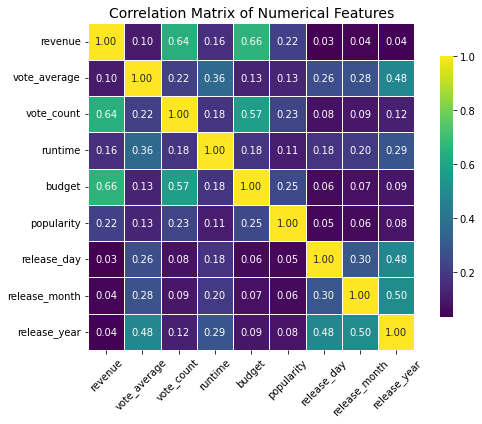

In [0]:
# Convert to Pandas
df_corr = train_df.select(numerical_features_target).toPandas()

# Plot correlation matrix using a pretty palette
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---
## Model-Based Importance for Decision Tree
---

In [0]:
# Split the data
train_df, test_df = df_final.randomSplit([0.8, 0.2], seed=12)

In [0]:
# Use full train_df with all features + target
all_features = train_df.drop("revenue").columns

# Assemble features
assembler = VectorAssembler(inputCols=all_features, outputCol="features")
train_assembled = assembler.transform(train_df)

# Fit Decision Tree
tree = DecisionTreeRegressor(featuresCol="features", labelCol="revenue")
model = tree.fit(train_assembled)

# Get feature importances
importances = model.featureImportances.toArray()
feature_importance_list = list(zip(all_features, importances))

# Sort and print
sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
print("🔎 Feature Importances (Descending):\n")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

🔎 Feature Importances (Descending):

budget: 0.4938
ROI: 0.3851
vote_count: 0.0962
runtime: 0.0149
release_year: 0.0080
release_month: 0.0014
adult: 0.0007
vote_average: 0.0000
popularity: 0.0000
release_day: 0.0000
released_bool: 0.0000
en_bool: 0.0000
tagline_bool: 0.0000
genre_action: 0.0000
genre_adventure: 0.0000
genre_comedy: 0.0000
genre_drama: 0.0000
genre_thriller: 0.0000
prodco_warner_bros_pictures: 0.0000
prodco_universal_pictures: 0.0000
prodco_20th_century_fox: 0.0000
country_united_states_of_america: 0.0000
country_united_kingdom: 0.0000
country_china: 0.0000
country_germany: 0.0000
country_france: 0.0000
keyword_sequel: 0.0000
keyword_duringcreditsstinger: 0.0000
keyword_based_on_novel_or_book: 0.0000


---
## Chi-Square Test (for categorical/boolean features)
---

In [0]:
# Discretize the revenue target into quantile buckets
discretizer = QuantileDiscretizer(numBuckets=4, inputCol="revenue", outputCol="revenue_bucket")
train_binned = discretizer.fit(train_df).transform(train_df)

# Combine boolean + categorical features
categorical_and_boolean_features = boolean_features + categorical_features

# Assemble into feature vector
assembler = VectorAssembler(inputCols=categorical_and_boolean_features, outputCol="features")
assembled = assembler.transform(train_binned)

# Apply Chi-Square feature selection
selector = ChiSqSelector(numTopFeatures=10, featuresCol="features", labelCol="revenue_bucket", outputCol="selected_features")
selector_model = selector.fit(assembled)

# Get selected feature indices
selected_feature_indices = selector_model.selectedFeatures

# Print feature names
print("Top features selected by Chi-Square test:")
for i in selected_feature_indices:
    print(f"- {categorical_and_boolean_features[i]}")

---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
File <command-1292540715583090>:10
      8 # Assemble into feature vector
      9 assembler = VectorAssembler(inputCols=categorical_and_boolean_features, outputCol="features")
---> 10 assembled = assembler.transform(train_binned)
     12 # Apply Chi-Square feature selection
     13 selector = ChiSqSelector(numTopFeatures=10, featuresCol="features", labelCol="revenue_bucket", outputCol="selected_features")

File /databricks/spark/python/pyspark/ml/base.py:262, in Transformer.transform(self, dataset, params)
    260         return self.copy(params)._transform(dataset)
    261     else:
--> 262         return self._transform(dataset)
    263 else:
    264     raise TypeError("Params must be a param map but got %s." % type(params))

File /databricks/spark/python/pyspark/ml/wrapper.py:400, in JavaTransformer._transform(self, dataset)
    397

---
## Lasso Regression (L1 Regularization)
---

In [0]:
# L1 regression = Lasso
lr = LinearRegression(featuresCol="features", labelCol="revenue", elasticNetParam=1.0, regParam=0.3)
model = lr.fit(train_assembled)

# Zip coefficients with feature names
coefficients = model.coefficients.toArray()
feature_names = assembler.getInputCols()

coef_feature_pairs = list(zip(feature_names, coefficients))

# Sort by absolute value (importance)
sorted_pairs = sorted(coef_feature_pairs, key=lambda x: abs(x[1]), reverse=True)

print("Feature Importances from L1-Regularized Linear Regression (Lasso):\n")
for feature, coef in sorted_pairs:
    if coef != 0.0:
        direction = "positive" if coef > 0 else "negative"
        print(f"- {feature}: {coef:.4f} ({direction} relationship with revenue)")
    else:
        print(f"- {feature}: {coef:.4f} (excluded by L1 regularization)")

Feature Importances from L1-Regularized Linear Regression (Lasso):

- prodco_universal_pictures: -28300870.4984 (negative relationship with revenue)
- released_bool: -13474985.1368 (negative relationship with revenue)
- country_united_kingdom: 8666910.5869 (positive relationship with revenue)
- country_france: -6680221.1647 (negative relationship with revenue)
- genre_action: 4924727.7050 (positive relationship with revenue)
- country_china: 4692922.7616 (positive relationship with revenue)
- keyword_based_on_novel_or_bookcountry_united_states_of_america: -4605933.0745 (negative relationship with revenue)
- keyword_sequel: -3168983.5524 (negative relationship with revenue)
- prodco_20th_century_fox: 2782356.6693 (positive relationship with revenue)
- country_germany: -2710091.2582 (negative relationship with revenue)
- adult: -797308.6172 (negative relationship with revenue)
- tagline_bool: 163249.5513 (positive relationship with revenue)
- genre_thriller: -79969.4007 (negative relatio

---
## Define Final Features
---

In [0]:
final_features = [
    "budget", "ROI", "vote_count", "runtime", "release_year",
    "adult", "release_month", "revenue"
]

---
## Assemble datasets
---

In [0]:
# CROSS-VALIDATION   (median)
def prep_for_cv(train_df, val_df):
    """
    - Compute runtime median on train; fill runtime==0 in both splits.
    - Try KNN imputation on 'popularity'; fall back to leaving zeros.
    Returns (train_ready, val_ready)
    """
    # -- runtime median (train only) --
    runtime_median = train_df.filter(F.col("runtime") != 0)\
                             .approxQuantile("runtime", [0.5], 0.0)[0]

    train_df = train_df.withColumn(
        "runtime",
        F.when(F.col("runtime") == 0, F.lit(runtime_median)).otherwise(F.col("runtime"))
    )
    val_df = val_df.withColumn(
        "runtime",
        F.when(F.col("runtime") == 0, F.lit(runtime_median)).otherwise(F.col("runtime"))
    )

    return train_df, val_df


train_df, test_df = prep_for_cv(train_df, test_df)
# 3. Assemble features
# Exclude label column
feature_cols = [c for c in train_df.columns if c != "revenue"]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

train_prepared = assembler.transform(train_df)
test_prepared  = assembler.transform(test_df)

---
## Train and evaluate models
---
We'll train and compare:

1. Linear Regression

2. Decision Tree Regressor

3. Random Forest Regressor

---
## Linear Regression with Cross-Validation
---

In [0]:
# Define and run Linear Regression with CrossValidator
lr = LinearRegression(featuresCol="features", labelCol="revenue")

lr_param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.3, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

evaluator = RegressionEvaluator(labelCol="revenue", predictionCol="prediction", metricName="rmse")

lr_cv = CrossValidator(estimator=lr,
                       estimatorParamMaps=lr_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

print("Training Linear Regression with Cross-Validation...")
lr_model = lr_cv.fit(train_prepared)

Training Linear Regression with Cross-Validation...


In [0]:
# Evaluate on the test set
def evaluate_model(model, df):
    predictions = model.transform(df)
    evaluator_rmse = RegressionEvaluator(labelCol="revenue", predictionCol="prediction", metricName="rmse")
    evaluator_r2   = RegressionEvaluator(labelCol="revenue", predictionCol="prediction", metricName="r2")
    return evaluator_rmse.evaluate(predictions), evaluator_r2.evaluate(predictions)

lr_rmse, lr_r2 = evaluate_model(lr_model.bestModel, test_prepared)

results = []
results.append(("Linear Regression (CV)", lr_rmse, lr_r2))

print(f"Best Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Best Linear Regression R²:   {lr_r2:.4f}")

---
## Decision Tree with Cross-Validation
---

In [0]:
# 1. Define the model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="revenue")

# 2. Define the parameter grid
dt_param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 5, 10]) \
    .addGrid(dt.minInstancesPerNode, [1, 5, 10]) \
    .build()

# 3. Define the evaluator
evaluator = RegressionEvaluator(labelCol="revenue", predictionCol="prediction", metricName="rmse")

# 4. Set up CrossValidator
dt_cv = CrossValidator(
    estimator=dt,
    estimatorParamMaps=dt_param_grid,
    evaluator=evaluator,
    numFolds=3
)

# 5. Train the model
print("Training Decision Tree Regressor with Cross-Validation...")
dt_model = dt_cv.fit(train_prepared)

# 6. Evaluate the model
dt_rmse, dt_r2 = evaluate_model(dt_model.bestModel, test_prepared)

results.append(("Decision Tree (CV)", dt_rmse, dt_r2))

print(f"Best Decision Tree RMSE: {dt_rmse:.2f}")
print(f"Best Decision Tree R²:   {dt_r2:.4f}")

---
## Random Forest with Cross-Validation
---

In [0]:
# Define the model
rf = RandomForestRegressor(featuresCol="features", labelCol="revenue", seed=42)

# Define the parameter grid
rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .addGrid(rf.maxBins, [32]) \
    .build()

# Define the evaluator
evaluator = RegressionEvaluator(labelCol="revenue", predictionCol="prediction", metricName="rmse")

# Set up CrossValidator
rf_cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3
)

# Train the model
print("Training Random Forest Regressor with Cross-Validation...")
rf_model = rf_cv.fit(train_prepared)

# Evaluate the model
rf_rmse, rf_r2 = evaluate_model(rf_model.bestModel, test_prepared)

results.append(("Random Forest (CV)", rf_rmse, rf_r2))

print(f"Best Random Forest RMSE: {rf_rmse:.2f}")
print(f"Best Random Forest R²:   {rf_r2:.4f}")
